In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [16]:
# Набор данных взят с https://www.kaggle.com/aashi20/top-50-spotify-songs
# Top-50 песен в Spotify в 2019 году.
data = pd.read_csv("datasets/top50.csv")
data.head(10)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,6,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,7,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,8,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,9,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,10,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [17]:
# Загрузка и анализ набора данных
new_data = pd.DataFrame()

In [18]:
#проблема 6
data_2 = pd.get_dummies(data['Genre'])
new_data = pd.concat([new_data, d])
new_data.head()

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,electropop,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


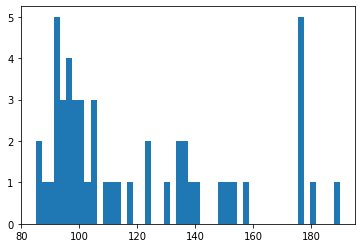

In [19]:

data_2 = data['Beats.Per.Minute']
plt.hist(data_2, bins=50)
plt.show()

In [20]:
#наблюдаются единичные выброс
data_2 = np.clip(data_2, 80, 160)


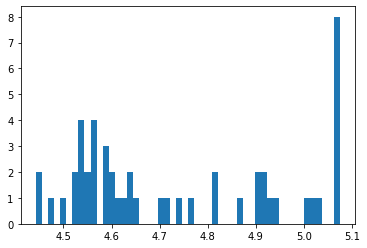

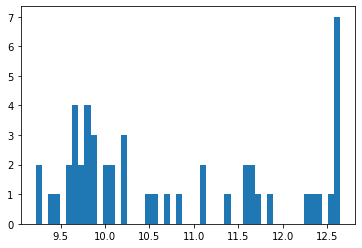

In [21]:

plt.hist(np.log(data_2), bins=50)
plt.show()
plt.hist(data_2**0.5, bins=50)
plt.show()
#график логарифма лучше

In [22]:
#преобразование значений  к общему интервалу
data_2 = np.array(np.log(data_2)).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Beats.Per.Minute'] = data_2
new_data.head(10)


,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,escape room,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.505156
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0.334074
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.142206
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.897966
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.288245
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1.000000
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0.421928
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.743062
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.731395


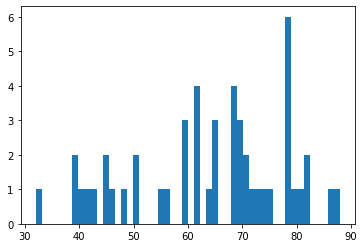

In [23]:
data_2 = data['Energy']

plt.hist(data_2, bins=50)
plt.show()

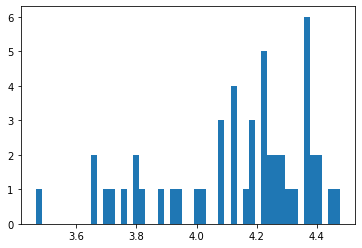

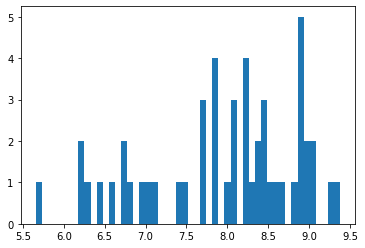

In [24]:
plt.hist(np.log(data_2), bins=50)
plt.show()
plt.hist(data_2**0.5, bins=50)
plt.show()
#график логарифма лучше

In [25]:
#преобразование значений  к общему интервалу
data_2 = np.array(np.log(data_2)).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Energy'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,latin,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.505156,0.535386
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.334074,0.918063
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1.000000,0.905783
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.142206,0.700525
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0.897966,0.700525
5,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.288245,0.745128
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1.000000,0.685198
7,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.421928,0.745128
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.743062,0.653814
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0.731395,0.292076


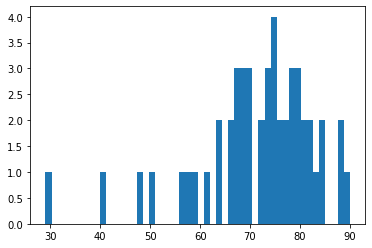

In [29]:
data_2 = data['Danceability']
plt.hist(data_2, bins=50)
plt.show()

In [31]:
#наблюдаются единичные выбросы
data_2 = np.clip(data_2, 55, 100)

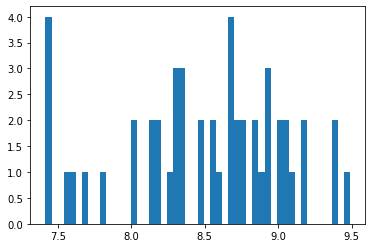

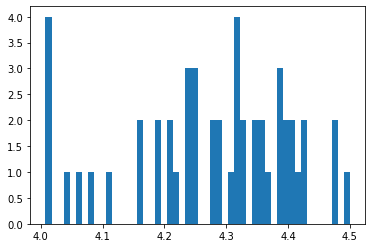

In [32]:
plt.hist(data_2**0.5, bins=50)
plt.show()
plt.hist(np.log(data_2,), bins=50)
plt.show()
#график лучше у корня

In [33]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2**0.5).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Danceability'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,panamanian pop,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0.505156,0.535386,0.628599
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0.334074,0.918063,0.710891
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1.000000,0.905783,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.142206,0.700525,0.281943
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0.897966,0.700525,0.096383
5,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.288245,0.745128,0.737974
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1.000000,0.685198,0.600809
7,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0.421928,0.745128,0.000000
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0.743062,0.653814,0.948807
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.731395,0.292076,0.458991


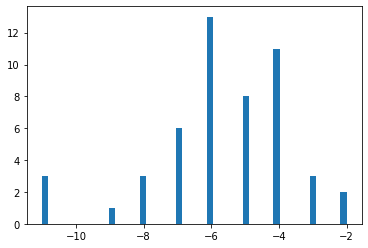

In [39]:
data_2 = data['Loudness..dB..']
plt.hist(data_2, bins=50)
plt.show()

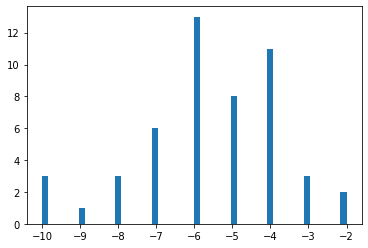

In [40]:
#наблюдаются единичные выбросы
data_2 = np.clip(data_2, -10, 0)
plt.hist(data_2, bins=50)
plt.show()

In [41]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Loudness..dB..'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,pop,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0.505156,0.535386,0.628599,0.500
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0.334074,0.918063,0.710891,0.750
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1.000000,0.905783,0.000000,0.750
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.142206,0.700525,0.281943,0.250
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0.897966,0.700525,0.096383,0.750
5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.288245,0.745128,0.737974,0.625
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1.000000,0.685198,0.600809,0.500
7,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0.421928,0.745128,0.000000,0.625
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0.743062,0.653814,0.948807,0.500
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.731395,0.292076,0.458991,0.000


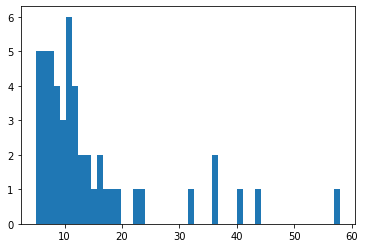

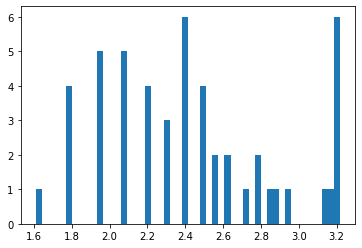

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,pop house,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0.505156,0.535386,0.628599,0.500,0.292030
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0.334074,0.918063,0.710891,0.750,0.292030
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.142206,0.700525,0.281943,0.250,0.292030
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0.897966,0.700525,0.096383,0.750,0.489896
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.288245,0.745128,0.737974,0.625,0.365212
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1.000000,0.685198,0.600809,0.500,0.209062
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.421928,0.745128,0.000000,0.625,0.292030
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.743062,0.653814,0.948807,0.500,0.489896
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0.731395,0.292076,0.458991,0.000,0.430677


In [50]:
data_2 = data['Liveness']
plt.hist(data_2, bins=50)
plt.show()
#наблюдаются единичные выброс + проблема 3
data_2 = np.clip(data_2, 0, 25)
plt.hist(np.log(data_2), bins=50)
plt.show()
#преобразование значений  к общему интервалу
#подходящая функция - логарифм
data_2 = np.array(np.log(data_2)).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Liveness'] = data_2
new_data.head(10)

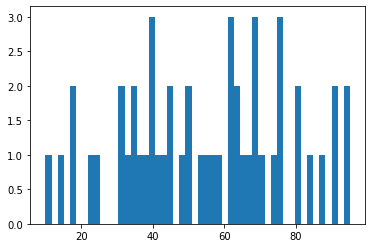

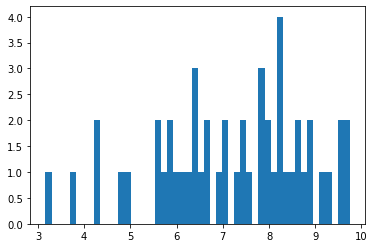

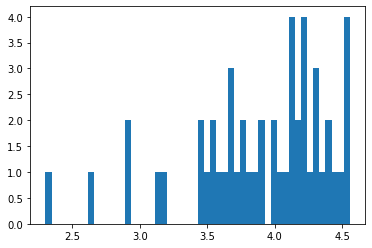

In [51]:
data_2 = data['Valence.']
plt.hist(data_2, bins=50)
plt.show()
plt.hist(data_2**0.5, bins=50)
plt.show()
plt.hist(np.log(data_2), bins=50)
plt.show()
#график лучше у корня

In [52]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2**0.5).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Valence.'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,r&b en espanol,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0.505156,0.535386,0.628599,0.500,0.292030,0.834986
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0.334074,0.918063,0.710891,0.750,0.292030,0.705894
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.142206,0.700525,0.281943,0.250,0.292030,0.646049
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0.897966,0.700525,0.096383,0.750,0.489896,0.164076
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.288245,0.745128,0.737974,0.625,0.365212,0.911665
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1.000000,0.685198,0.600809,0.500,0.209062,0.248090
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.421928,0.745128,0.000000,0.625,0.292030,0.418224
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0.743062,0.653814,0.948807,0.500,0.489896,0.734712
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0.731395,0.292076,0.458991,0.000,0.430677,0.656242


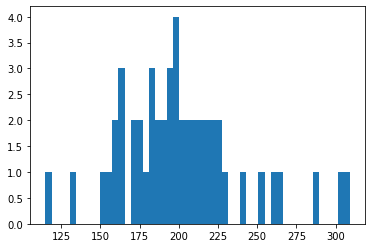

In [55]:
data_2 = data['Length.']
plt.hist(data_2, bins=50)
plt.show()

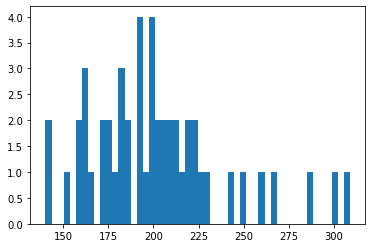

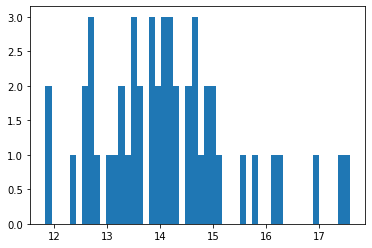

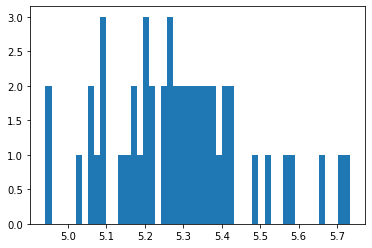

In [56]:
#наблюдаются единичные выброс
data_2 = np.clip(data_2, 140, 500)
plt.hist(data_2, bins=50)
plt.show()
plt.hist(data_2**0.5, bins=50)
plt.show()
plt.hist(np.log(data_2), bins=50)
plt.show()
#график лучше у корня

In [57]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2**0.5).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Length.'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,reggaeton,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0.505156,0.535386,0.628599,0.500,0.292030,0.834986,0.345986
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0.334074,0.918063,0.710891,0.750,0.292030,0.705894,0.965151
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.142206,0.700525,0.281943,0.250,0.292030,0.646049,0.389662
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0.897966,0.700525,0.096383,0.750,0.489896,0.164076,0.243046
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.288245,0.745128,0.737974,0.625,0.365212,0.911665,0.522122
6,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1.000000,0.685198,0.600809,0.500,0.209062,0.248090,0.000000
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.421928,0.745128,0.000000,0.625,0.292030,0.418224,0.414273
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0.743062,0.653814,0.948807,0.500,0.489896,0.734712,0.121437
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0.731395,0.292076,0.458991,0.000,0.430677,0.656242,0.364800


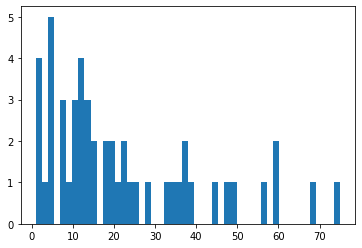

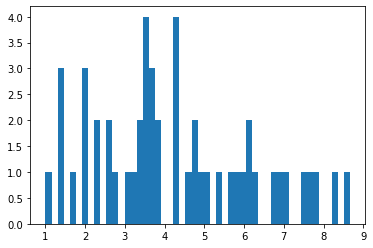

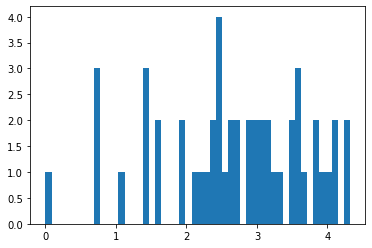

In [58]:
data_2 = data['Acousticness..']
plt.hist(data_2, bins=50)
plt.show()
plt.hist(data_2**0.5, bins=50)
plt.show()
plt.hist(np.log(data_2), bins=50)
plt.show()
#график лучше у корня + в лог есть нули

In [59]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2**0.5).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Acousticness..'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,reggaeton flow,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0.505156,0.535386,0.628599,0.500,0.292030,0.834986,0.345986,0.130544
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0.334074,0.918063,0.710891,0.750,0.292030,0.705894,0.965151,0.238690
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297,0.321674
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0.142206,0.700525,0.281943,0.250,0.292030,0.646049,0.389662,0.321674
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0.897966,0.700525,0.096383,0.750,0.489896,0.164076,0.243046,0.745172
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0.288245,0.745128,0.737974,0.625,0.365212,0.911665,0.522122,0.261088
6,0,0,0,0,0,0,0,0,0,0,...,0,1,1.000000,0.685198,0.600809,0.500,0.209062,0.248090,0.000000,0.054073
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0.421928,0.745128,0.000000,0.625,0.292030,0.418224,0.414273,0.375051
8,0,0,0,0,0,0,0,1,0,0,...,0,0,0.743062,0.653814,0.948807,0.500,0.489896,0.734712,0.121437,0.161361
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0.731395,0.292076,0.458991,0.000,0.430677,0.656242,0.364800,0.619374


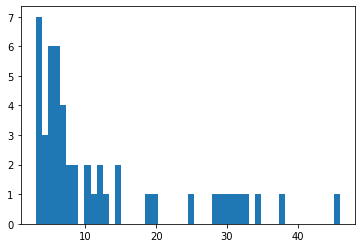

In [62]:
data_2 = data['Speechiness.']
plt.hist(data_2, bins=50)
plt.show()

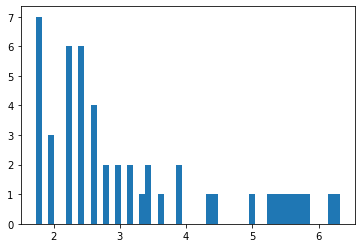

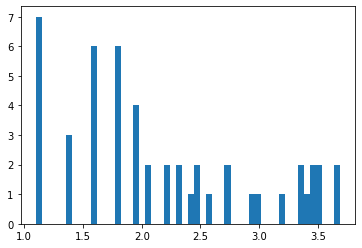

In [63]:
#наблюдаются единичные выброс
data_2 = np.clip(data_2, 0, 40)
plt.hist(data_2**0.5, bins=50)
plt.show()
plt.hist(np.log(data_2), bins=50)
plt.show()
#график лучше у корня 

In [64]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2**0.5).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Speechiness.'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,trap music,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,0,0,0,0,0,0,1,0,0,0,...,0,0.505156,0.535386,0.628599,0.500,0.292030,0.834986,0.345986,0.130544,0.000000
1,0,0,0,0,0,0,0,0,0,0,...,0,0.334074,0.918063,0.710891,0.750,0.292030,0.705894,0.965151,0.238690,0.276091
2,0,0,0,0,0,0,0,0,1,0,...,0,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297,0.321674,1.000000
3,0,0,0,0,0,0,0,0,0,0,...,0,0.142206,0.700525,0.281943,0.250,0.292030,0.646049,0.389662,0.321674,0.571986
4,0,0,0,0,0,0,0,0,0,1,...,0,0.897966,0.700525,0.096383,0.750,0.489896,0.164076,0.243046,0.745172,0.198955
5,0,0,0,0,0,0,0,0,0,0,...,0,0.288245,0.745128,0.737974,0.625,0.365212,0.911665,0.522122,0.261088,0.058345
6,0,0,0,0,0,0,0,0,0,0,...,1,1.000000,0.685198,0.600809,0.500,0.209062,0.248090,0.000000,0.054073,0.795451
7,0,0,0,0,0,0,0,0,0,0,...,0,0.421928,0.745128,0.000000,0.625,0.292030,0.418224,0.414273,0.375051,0.276091
8,0,0,0,0,0,0,0,1,0,0,...,0,0.743062,0.653814,0.948807,0.500,0.489896,0.734712,0.121437,0.161361,0.311426
9,0,0,0,0,0,0,0,0,0,0,...,0,0.731395,0.292076,0.458991,0.000,0.430677,0.656242,0.364800,0.619374,0.965130


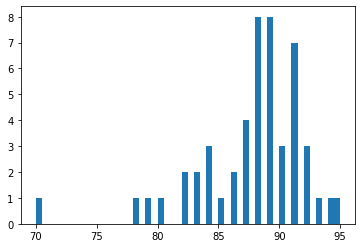

In [67]:
data_2 = data['Popularity']
plt.hist(data_2, bins=50)
plt.show()

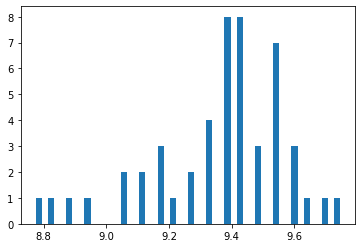

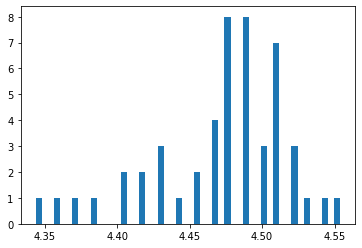

In [68]:
#наблюдаются единичные выброс
data_2 = np.clip(data_2, 77, 100)
plt.hist(data_2**0.5, bins=50)
plt.show()
plt.hist(np.log(data_2), bins=50)
plt.show()
#график лучше у корня 

In [69]:
#преобразование значений  к общему интервалу
data_2 = np.array(data_2**0.5).reshape(-1, 1)
data_2 = MinMaxScaler().fit_transform(data_2).flatten()
new_data['Popularity'] = data_2
new_data.head(10)

,atl hip hop,australian pop,big room,boy band,brostep,canadian hip hop,canadian pop,country rap,dance pop,dfw rap,...,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,0,0,0,0,0,0,1,0,0,0,...,0.505156,0.535386,0.628599,0.500,0.292030,0.834986,0.345986,0.130544,0.000000,0.116512
1,0,0,0,0,0,0,0,0,0,0,...,0.334074,0.918063,0.710891,0.750,0.292030,0.705894,0.965151,0.238690,0.276091,0.840372
2,0,0,0,0,0,0,0,0,1,0,...,1.000000,0.905783,0.000000,0.750,0.722706,0.790388,0.314297,0.321674,1.000000,0.457467
3,0,0,0,0,0,0,0,0,0,0,...,0.142206,0.700525,0.281943,0.250,0.292030,0.646049,0.389662,0.321674,0.571986,0.513108
4,0,0,0,0,0,0,0,0,0,1,...,0.897966,0.700525,0.096383,0.750,0.489896,0.164076,0.243046,0.745172,0.198955,0.947074
5,0,0,0,0,0,0,0,0,0,0,...,0.288245,0.745128,0.737974,0.625,0.365212,0.911665,0.522122,0.261088,0.058345,0.401497
6,0,0,0,0,0,0,0,0,0,0,...,1.000000,0.685198,0.600809,0.500,0.209062,0.248090,0.000000,0.054073,0.795451,0.840372
7,0,0,0,0,0,0,0,0,0,0,...,0.421928,0.745128,0.000000,0.625,0.292030,0.418224,0.414273,0.375051,0.276091,0.732503
8,0,0,0,0,0,0,0,1,0,0,...,0.743062,0.653814,0.948807,0.500,0.489896,0.734712,0.121437,0.161361,0.311426,0.568427
9,0,0,0,0,0,0,0,0,0,0,...,0.731395,0.292076,0.458991,0.000,0.430677,0.656242,0.364800,0.619374,0.965130,1.000000


In [70]:
new_data.to_csv('prepared_data_1.csv')
new_data.to_csv('prepared_data_2.csv', index=False)